In [ ]:
import pandas as pd 
from pandas import DataFrame

data = [
    ["037730", "3R", 1510],
    ["036360", "3SOFT", 1790],
    ["005670", "ACTS", 1185]
]

columns = ["종목코드", "종목명", "현재가"]
df = DataFrame(data=data, columns=columns)
df.set_index("종목코드", inplace=True)
# print(df)

# ascending=False : 내림차순
# ascending=True (기본값) : 오름차순
# print(df.sort_values(by="종목명", ascending=False)) 
# print(df.sort_values(by="종목명", ascending=True))

# print(df.sort_index()) # 기본값
# print(df.sort_index(ascending=False)) # 역순

# 인덱스 연산
# 합집합, 교집합, 차집합의 원리를 이용해서, 데이터 병합을 할 때 사용
idx1 = pd.Index([1, 2, 3])
idx2 = pd.Index([2, 3, 4]) 

# print(idx1.union(idx2))
# print(idx1.intersection(idx2))
# print(idx1.difference(idx2))

from pandas import DataFrame

data = [
    ["2차전지(생산)", "SK이노베이션", 10.19, 1.29],
    ["해운", "팬오션", 21.23, 0.95],
    ["시스템반도체", "티엘아이", 35.97, 1.12],
    ["해운", "HMM", 21.52, 3.20],
    ["시스템반도체", "아이에이", 37.32, 3.55],
    ["2차전지(생산)", "LG화학", 83.06, 3.75]
]

columns = ["테마", "종목명", "PER", "PBR"]
df = DataFrame(data=data, columns=columns)
# print(df)

result = df.groupby("테마")[["PER", "PBR"]].mean()
# print(result, type(result))

# print(df.groupby("테마").get_group("2차전지(생산)"))
# print(df.groupby("테마").get_group("시스템반도체"))
# print(df.groupby("테마").get_group("해운"))

result = df.groupby("테마")[["PER", "PBR"]].mean()

df = pd.read_excel("dataset/ss_ex_1.xlsx" , parse_dates=['일자'], index_col=0)
# print(df.head())
df = df.reset_index()
# print(df.head(1))
# print(df.info())

# column 추가
df['분기'] = df['일자'].dt.quarter
df['연도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month
df['일'] = df['일자'].dt.day

print(df.head(1))

# result = df.groupby(['연도', '월']).get_group((2021, 2))
# print(result)
result = df.groupby(['연도', '월'])['시가'].mean()
# print(result)
multiples = {
    "시가": "first", 
    "저가": min, 
    "고가" : max, 
    "종가" : 'last'
}
result = df.groupby(['연도', '분기', '월']).agg(multiples)
print(result)
print(result.reset_index())

In [ ]:
import pandas as pd 
from pandas import DataFrame

data = [
    ["037730", "3R", 1510],
    ["036360", "3SOFT", 1790],
    ["005670", "ACTS", 1185]
]

columns = ["종목코드", "종목명", "현재가"]
df = DataFrame(data=data, columns=columns)
df.set_index("종목코드", inplace=True)
print(df)

# plotly 시각화 연습 
    - 대화형 차트 
    - java script 와 관련이 alot

#### 주요 클래스
- subplot
- figure factory ( express 에 통합되는 중~ )
- io
- graph_objects
- express

In [1]:
import plotly

plotly.__version__

'5.24.1'

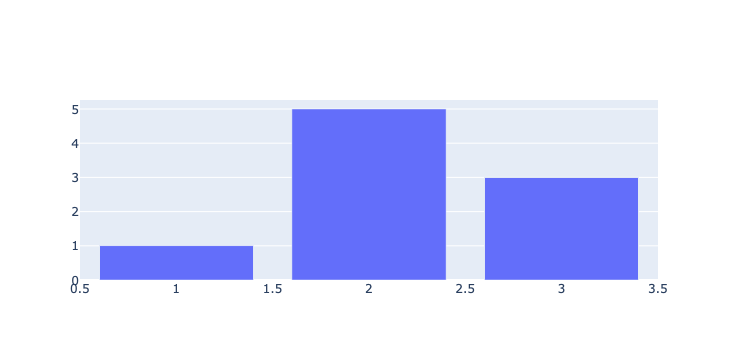

In [11]:
# 기본적인 자료형은 list 
import plotly.graph_objects as go # matplotlib과 개념 유사 


fig = go.Figure()
fig.add_trace(go.Bar(x=[1,2,3],y=[1,5,3]))
fig.show()

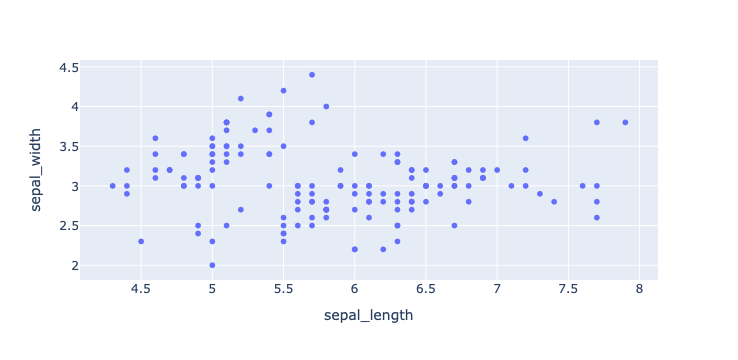

In [7]:
# df 와 바로 연결되는게 seaborn
import plotly.express as px # seaborn과 개념적으로 유사 

iris = px.data.iris()
fig = px.scatter(iris, x ='sepal_length',y ='sepal_width')
fig.show()

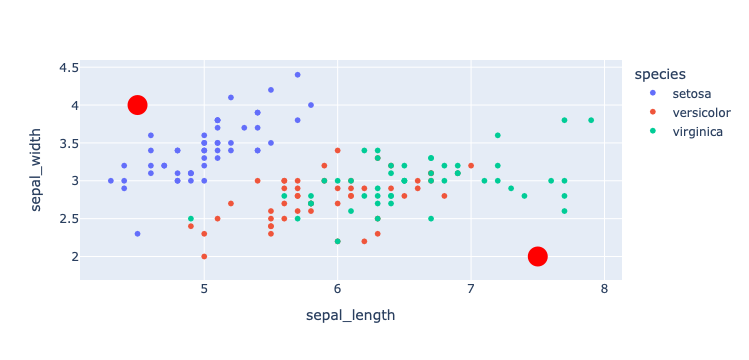

In [18]:
# 옵션 추가 
iris = px.data.iris()
fig = px.scatter(iris, x ='sepal_length',y ='sepal_width',color = 'species')
# 직선 추가
fig.add_trace(
    go.Scatter(
        x = [4.5,7.5],
        y = [4,2],
        # mode = 'lines',
        # line = go.scatter.Line(color ='red'),

        # marker 추가
        mode ='markers',
        marker = dict(size = 20, color ='red'),
        showlegend = False
    )
)
fig.show()

# plotly 기본문법

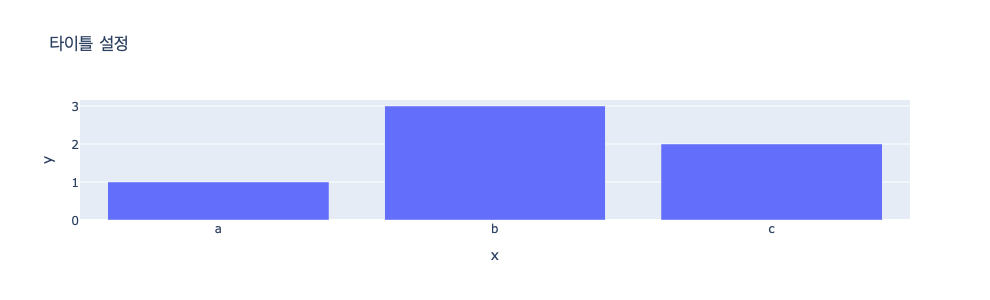

In [34]:
# express
fig = px.bar(x=['a','b','c'], y=[1,3,2], width=600, height=300, title = '타이틀 설정')
fig.show()


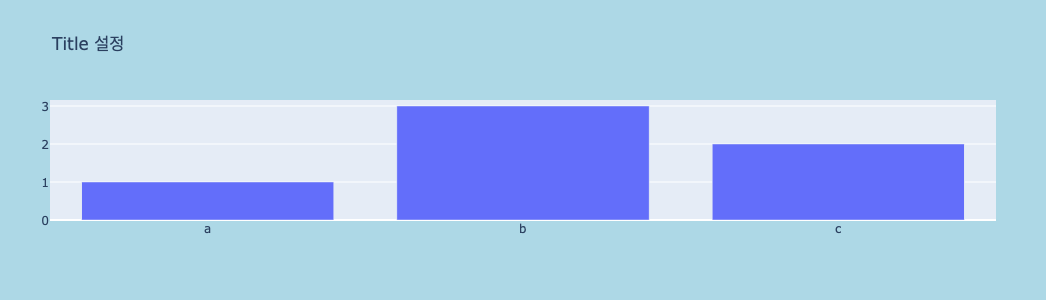

In [40]:
import plotly.express as px
import plotly.graph_objects as go

# graph object
fig = go.Figure(data =[go.Bar(x=['a','b','c'], y=[1,3,2])],
                layout = go.Layout(title=go.layout.Title(text ='Title 설정')))

# 옵션은 update_layout 에서 (그래프 외부)
fig.update_layout(width = 500,
                  height = 300,
                  margin_l = 50,
                  margin_r = 50,

                  # 백그라운드 색상 지정
                  paper_bgcolor = 'lightblue')
fig.show()

## 타이틀 설정

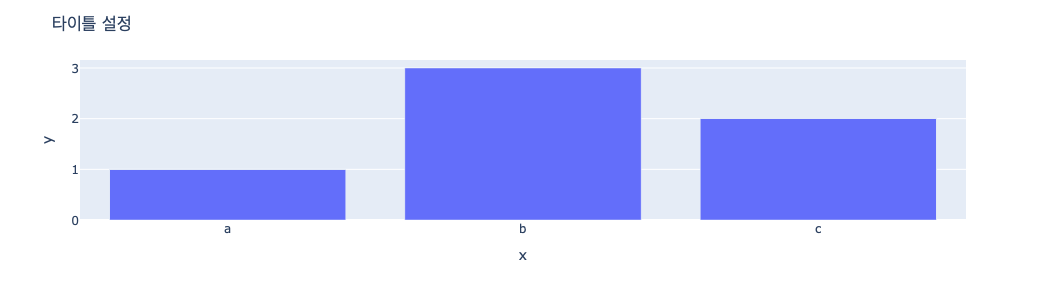

In [38]:
# express
fig = px.bar(x = ["a", "b", "c"], 
             y = [1, 3, 2], width = 600, height = 300)

fig.update_layout(title_text = '타이틀 설정')
fig.show()

# Hover 설정

In [43]:
df = px.data.gapminder().query("continent == 'Oceania'")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.12,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.33,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.93,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.10,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.93,13177000,16788.62948,AUS,36


<class 'plotly.graph_objs._figure.Figure'>


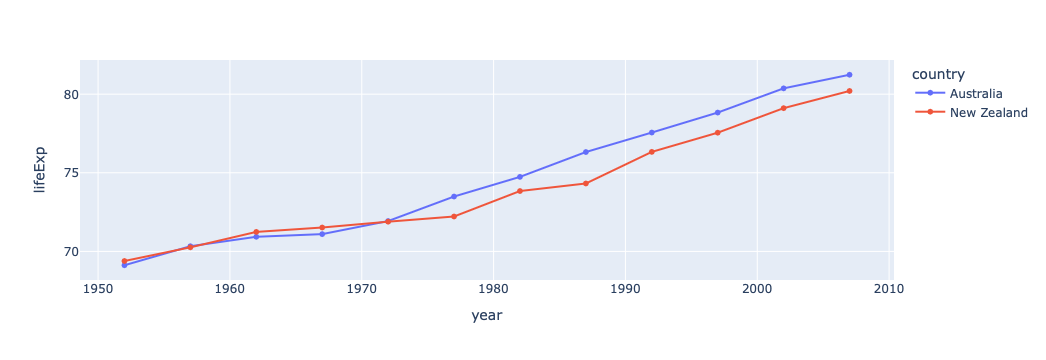

In [51]:
fig = px.line(df, x='year',y='lifeExp',color ='country')

# 그래프 내부의 색상, 모양 등등 변경: update_traces()
fig.update_traces(mode = 'markers+lines')

# hover는 그래프 외부
fig.update_layout(hovermode= 'y')

fig.show()

# 캔들 차트

In [57]:
!pip install yfinance --upgrade --no-cache-dir

import yfinance as yf
import plotly.graph_objects as go

indo = yf.download("INDO",start = '2023-01-01', end = '2024-09-30')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 5.1 MB/s eta 0:00:00 MB/s eta 0:00:01
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=f6ba730fea075e0a33e00f314d8d38a1f8286d0cad81cc273a486b232f9baf25
  Stored in directory: /private/var/folders/b9/_gjz7nvj7pb9z2jrhj9r9ptr0000gn/T/pip-ephem-wheel-cache-mlieeaag/wheels/a6/5e/0f/8319805c4115320e0d3e8fb5799b114a2e4c4a3d6c7e523b06
Successfully built peewee


[*********************100%***********************]  1 of 1 completed


In [61]:
import yfinance as yf
import plotly.graph_objects as go

indo = yf.download("INDO",start = '2023-01-01', end = '2024-09-30')
indo.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,4.63,4.67,4.40,4.58,4.58,121100
2023-01-04,4.45,4.68,4.45,4.66,4.66,115800
2023-01-05,4.56,4.90,4.55,4.86,4.86,99800
2023-01-06,4.88,5.22,4.88,5.01,5.01,181300
2023-01-09,5.37,5.85,5.19,5.76,5.76,434700


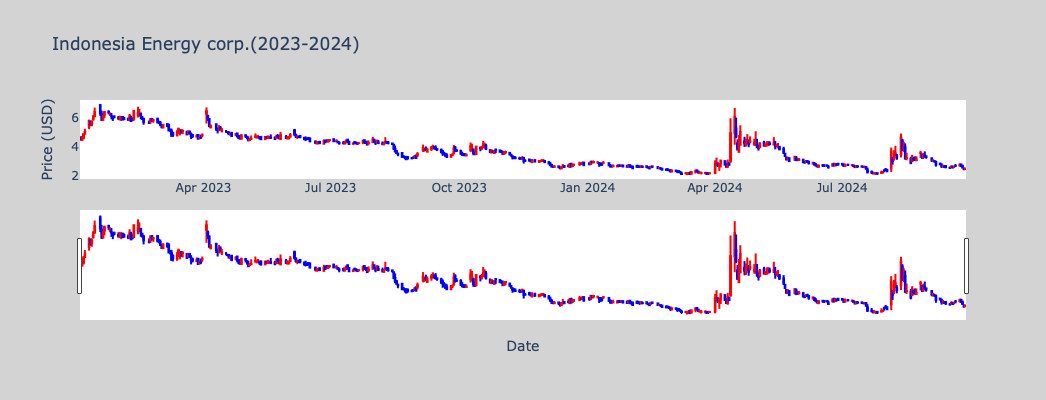

In [82]:
# date 가 인덱스여서 so x를 index로 바꾸거나 set index 로 바꿔줌
fig = go.Figure(data=[go.Candlestick(x=indo.index,
                open=indo['Open'],
                high=indo ['High'],
                low=indo ['Low'],
                close=indo['Close'])])

# 차트 제목, 축 레이블 설정
# update_layout 
fig.update_layout(
    title='Indonesia Energy corp.(2023-2024)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    width=800,  # 그래프 크기 설정 (선택 사항)
    height=400,
    paper_bgcolor='lightgray',# 그래프 배경색 (선택 사항)
    plot_bgcolor = 'white',
    hovermode ='x', # hover
    xaxis_rangeslider_visible =True,
    xaxis_rangeslider_thickness = 0.5
)
# update_trace 
# candle stick 색상 변경
fig.update_traces(
    increasing_line_color='red',    # 양봉 (상승) 선 색상
    decreasing_line_color='blue',      # 음봉 (하락) 선 색상
    increasing_fillcolor='orange',  # 양봉 (상승) 채우기 색상
    decreasing_fillcolor='lightcoral'   # 음봉 (하락) 채우기 색상
)

fig.show()

In [62]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>